# Name:Ajit A Gouda

# Batch:DS2311

In [62]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('rainfalldataset.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

has we see there many missing values

In [5]:
df.duplicated().sum()

1663

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.drop('Date', axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [8]:
float_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='float':
        float_cols.append(i)
    
obj_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]!='float' :
        obj_cols.append(x)

print('float columns are=',float_cols,'\n')
print('Object columns are=',obj_cols)

float columns are= ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 

Object columns are= ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year']


In [10]:
for i in obj_cols:
    print(("\033[1m"+i+"\033[0m"))
    print(df[i].value_counts())
    print('-'*100)

Location
Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
WindGustDir
WindGustDir
E      518
SW     465
N      459
W      434
WSW    420
WNW    398
SSE    390
S      376
SE     370
ENE    357
NE     300
SSW    299
NW     296
NNE    287
ESE    267
NNW    184
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
WindDir9am
WindDir9am
N      609
SW     590
NW     463
SE     439
ENE    397
WSW    394
SSW    368
NE     364
E      338
NNE    337
S      324
WNW    301
SSE    300
W      299
ESE    229
NNW    216
Name: count, dtype: int64
----------------------------------------------------

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,6692.0,13.109145,5.569574,-2.0,9.0,13.2,17.5,28.5
MaxTemp,6705.0,24.098345,6.156128,8.2,19.5,23.5,28.4,45.5
Rainfall,6624.0,2.780148,10.591418,0.0,0.0,0.0,0.8,371.0
Evaporation,3841.0,5.302395,4.436790,0.0,2.6,4.6,7.0,145.0
Sunshine,3526.0,7.890896,3.785883,0.0,5.4,9.0,10.8,13.9
WindGustSpeed,5820.0,38.977663,14.418577,7.0,30.0,37.0,48.0,107.0
WindSpeed9am,6699.0,12.782206,9.833499,0.0,6.0,11.0,19.0,63.0
WindSpeed3pm,6662.0,17.571150,9.620043,0.0,9.0,17.0,24.0,83.0
Humidity9am,6708.0,67.506559,17.251733,10.0,56.0,68.0,81.0,100.0
Humidity3pm,6666.0,50.467147,18.631086,6.0,38.0,50.0,63.0,99.0


- We calculated the range, mean, and standard deviation for each column.
- The presence of significant differences between the 75th percentile and maximum values in some columns suggests potential outliers.
- The disparity between the mean and median (50th percentile) in certain columns indicates skewness in the data distribution.

In [16]:
for i in obj_cols:
    df[i]=df[i].fillna(df[i].mode()[0])

for i in float_cols:
    df[i]=df[i].fillna(df[i].mean())

In [17]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

Consequently, following the data treatment process, our datasets are devoid of missing values.

visualisation 

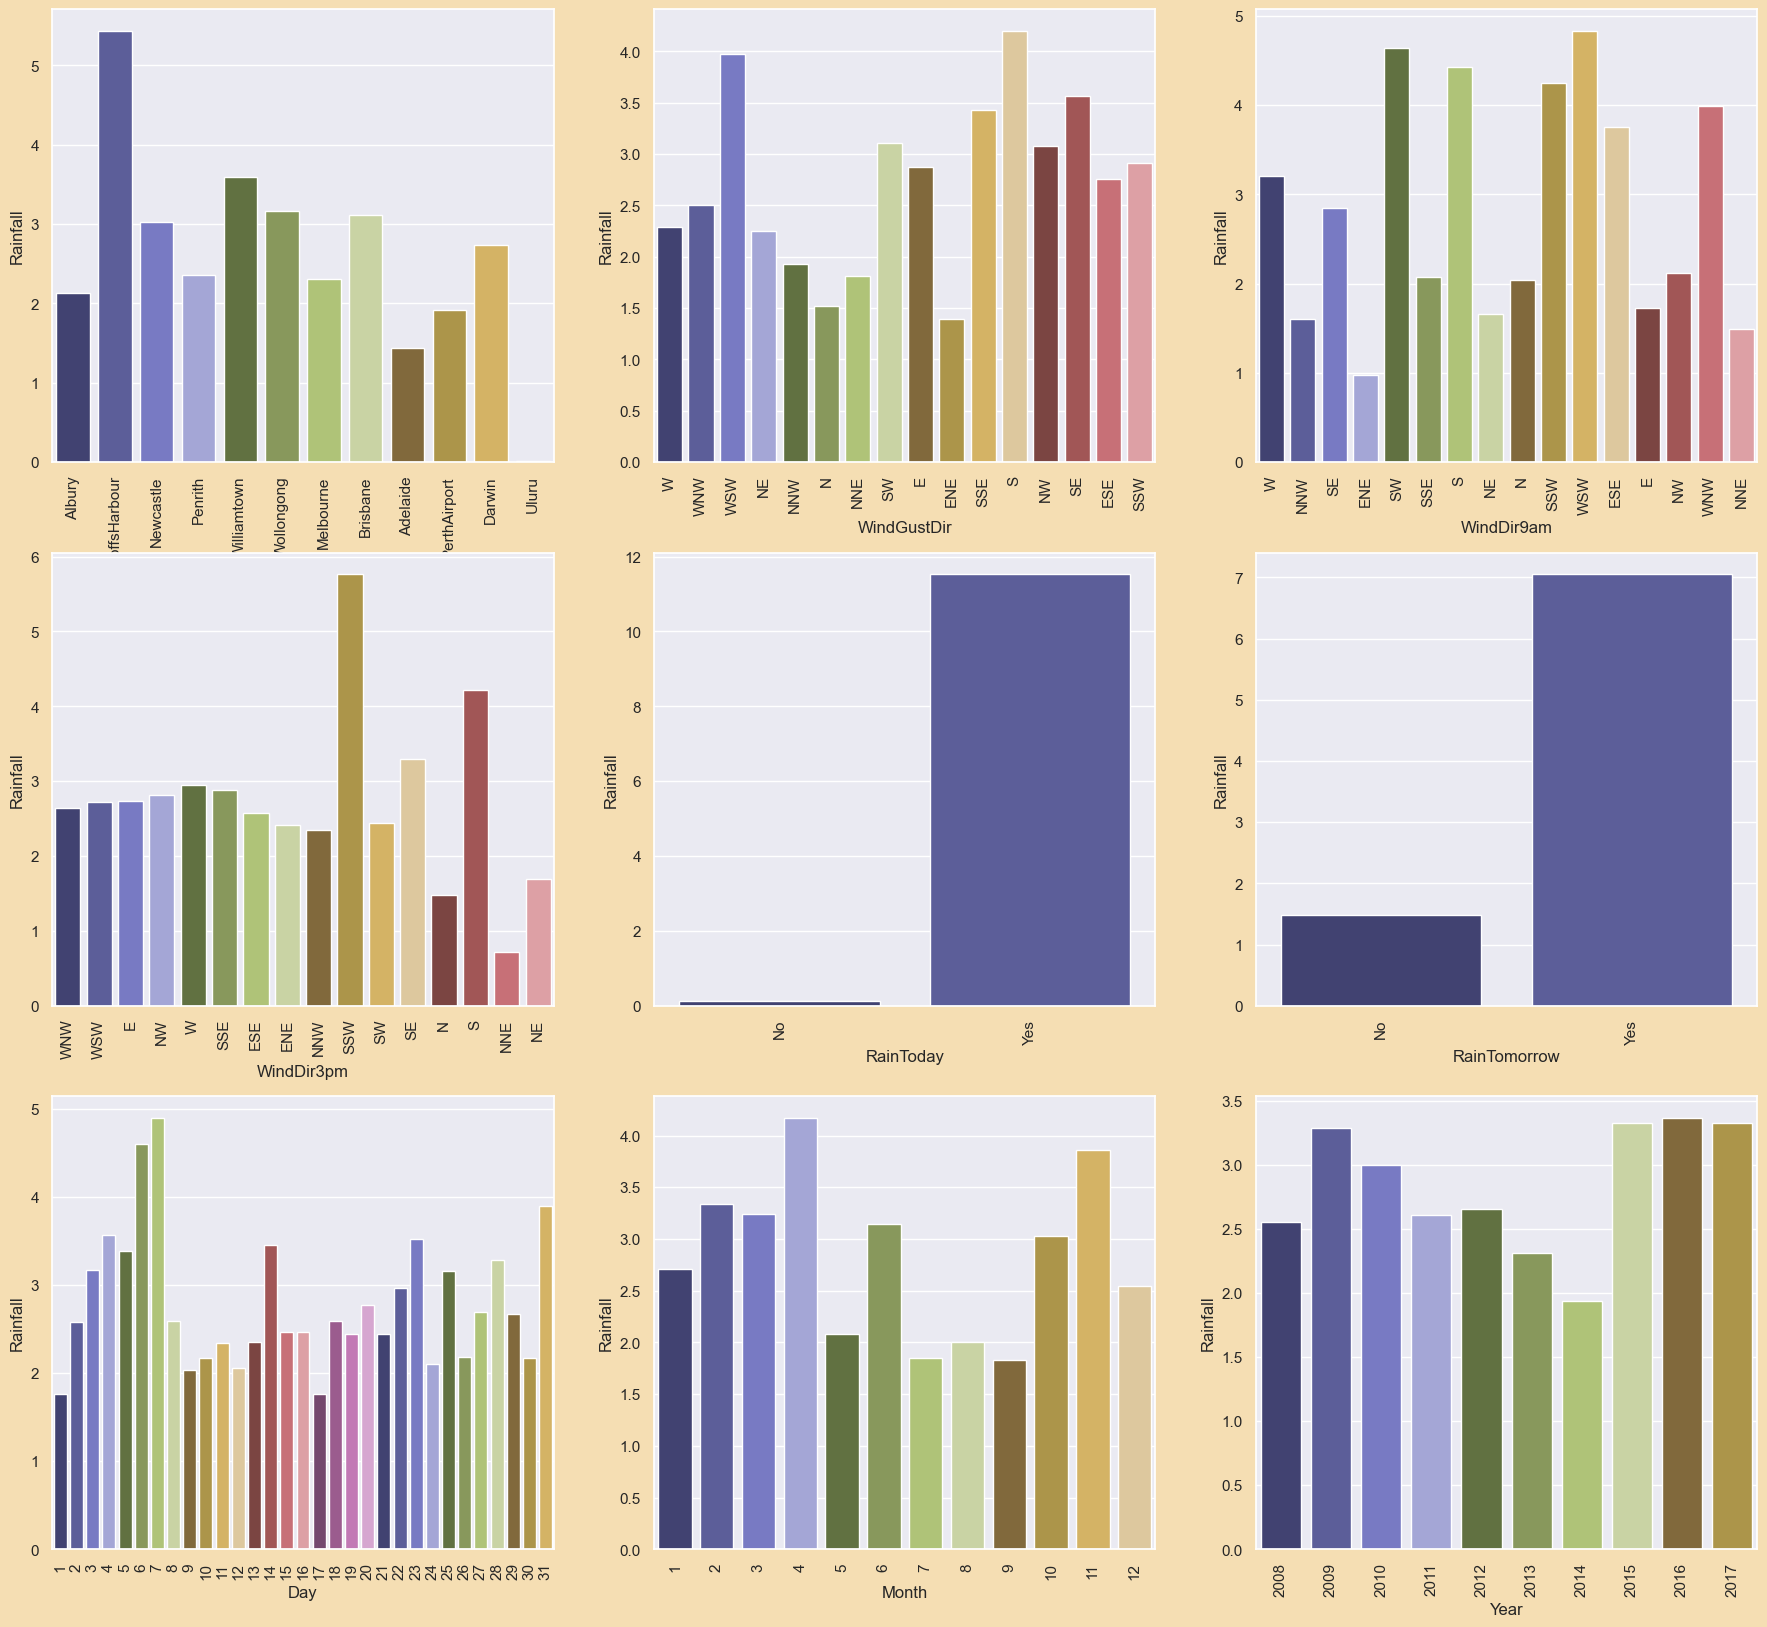

In [27]:
sb.set_style('darkgrid')
sb.set(font_scale=1)
pt.figure(facecolor='wheat',figsize=(22,20))
p=1
for i in obj_cols:
    if p<=9:
        ax=pt.subplot(3,3,p)
        sb.barplot(x=df[i],palette='tab20b',y='Rainfall',data=df,errorbar=None)
        pt.xticks(rotation=90)
    p+=1

#### The provided bar charts visually represent the distribution of rainfall values (measured in centimeters) across the various categories within the object data type columns.

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

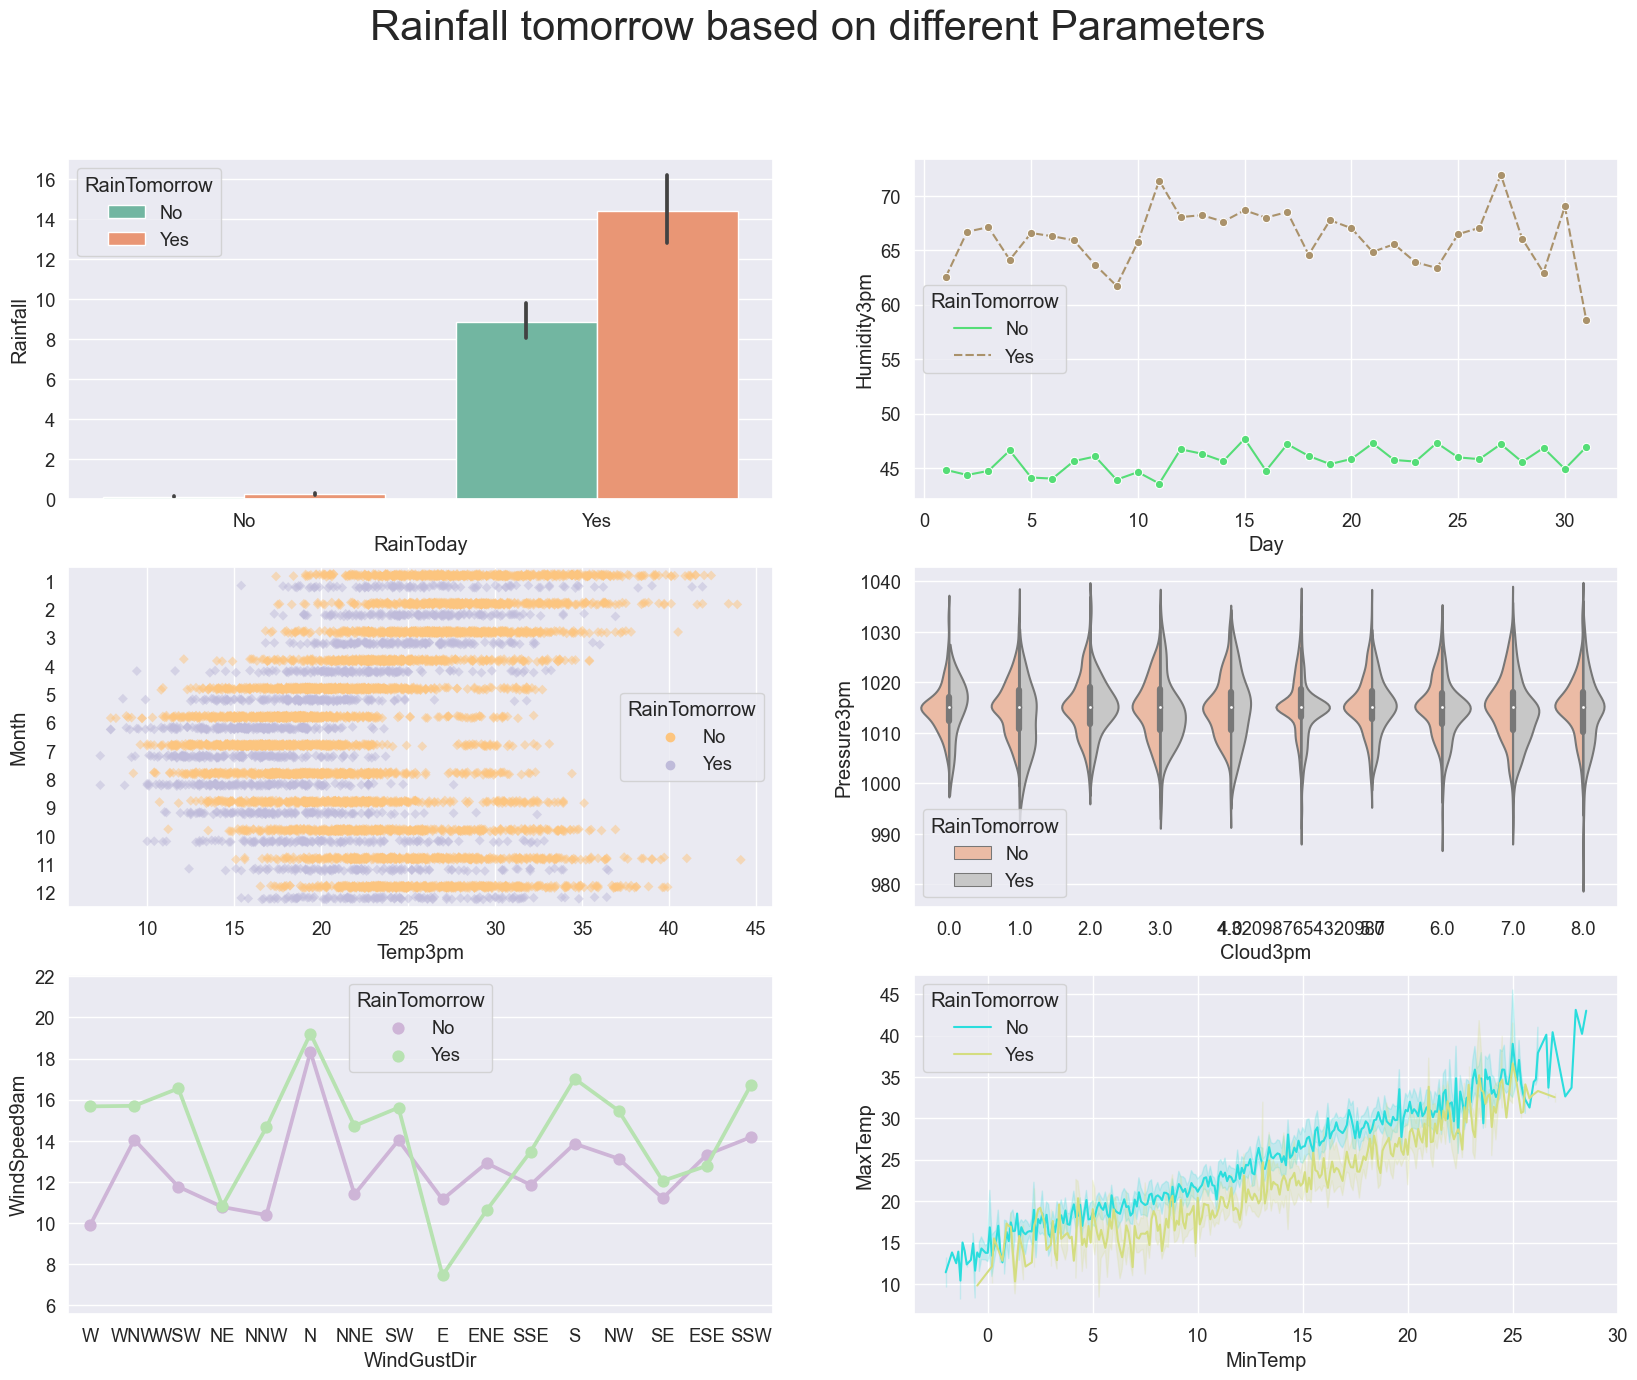

In [28]:
sb.set(font_scale=1.2)
fig,axes = pt.subplots(3, 2, figsize=(20,15))
fig.suptitle('Rainfall tomorrow based on different Parameters',fontsize=30) 
sb.barplot(ax=axes[0, 0],x='RainToday',y='Rainfall',hue='RainTomorrow',data=df,palette="Set2") 
sb.lineplot(ax=axes[0, 1],x='Day',y='Humidity3pm',hue='RainTomorrow',style='RainTomorrow',marker='o',errorbar=None,data=df,palette="terrain")
sb.stripplot(ax=axes[1, 0],y='Month',x='Temp3pm',hue='RainTomorrow',data=df,palette="PuOr",orient='h',marker='D',alpha=.5,dodge=True)
sb.violinplot(ax=axes[1, 1],x='Cloud3pm',y='Pressure3pm',hue='RainTomorrow',data=df,palette="RdGy",split=True)
sb.pointplot(ax=axes[2, 0],y='WindSpeed9am',x='WindGustDir',hue='RainTomorrow',data=df,palette="PRGn",errwidth=0)
sb.lineplot(ax=axes[2, 1],x='MinTemp',y='MaxTemp',hue='RainTomorrow',data=df,palette='rainbow')

Analysis of Target Variable: RainTomorrow

Given that the "RainTomorrow" column is our target variable, we constructed graphs using it as the hue to gain a deeper understanding of its behavior. Our observations are as follows:

- Positive Correlation Between Today's Rain and Tomorrow's Rain: There exists a strong positive correlation between rainfall today and the likelihood of rain tomorrow. In simpler terms, if it rains today, there is a high probability of rain occurring tomorrow as well.
- Humidity as a Threshold for RainTomorrow: Our analysis suggests that rain tomorrow is more likely to occur when the 3 PM humidity reading surpasses 55 units.
- Temperature and RainTomorrow: A direct relationship is observed between the 3 PM temperature and the probability of rain tomorrow. As the temperature increases, the chance of rain tomorrow also increases.
- Pressure at 3 PM: The pressure readings at 3 PM typically fall within the range of 1000 to 1300 units.
- Wind Speed and RainTomorrow: Our findings indicate a positive correlation between wind speed and the likelihood of rain tomorrow, regardless of the wind direction. In other words, higher wind speeds are associated with an increased chance of rain tomorrow.

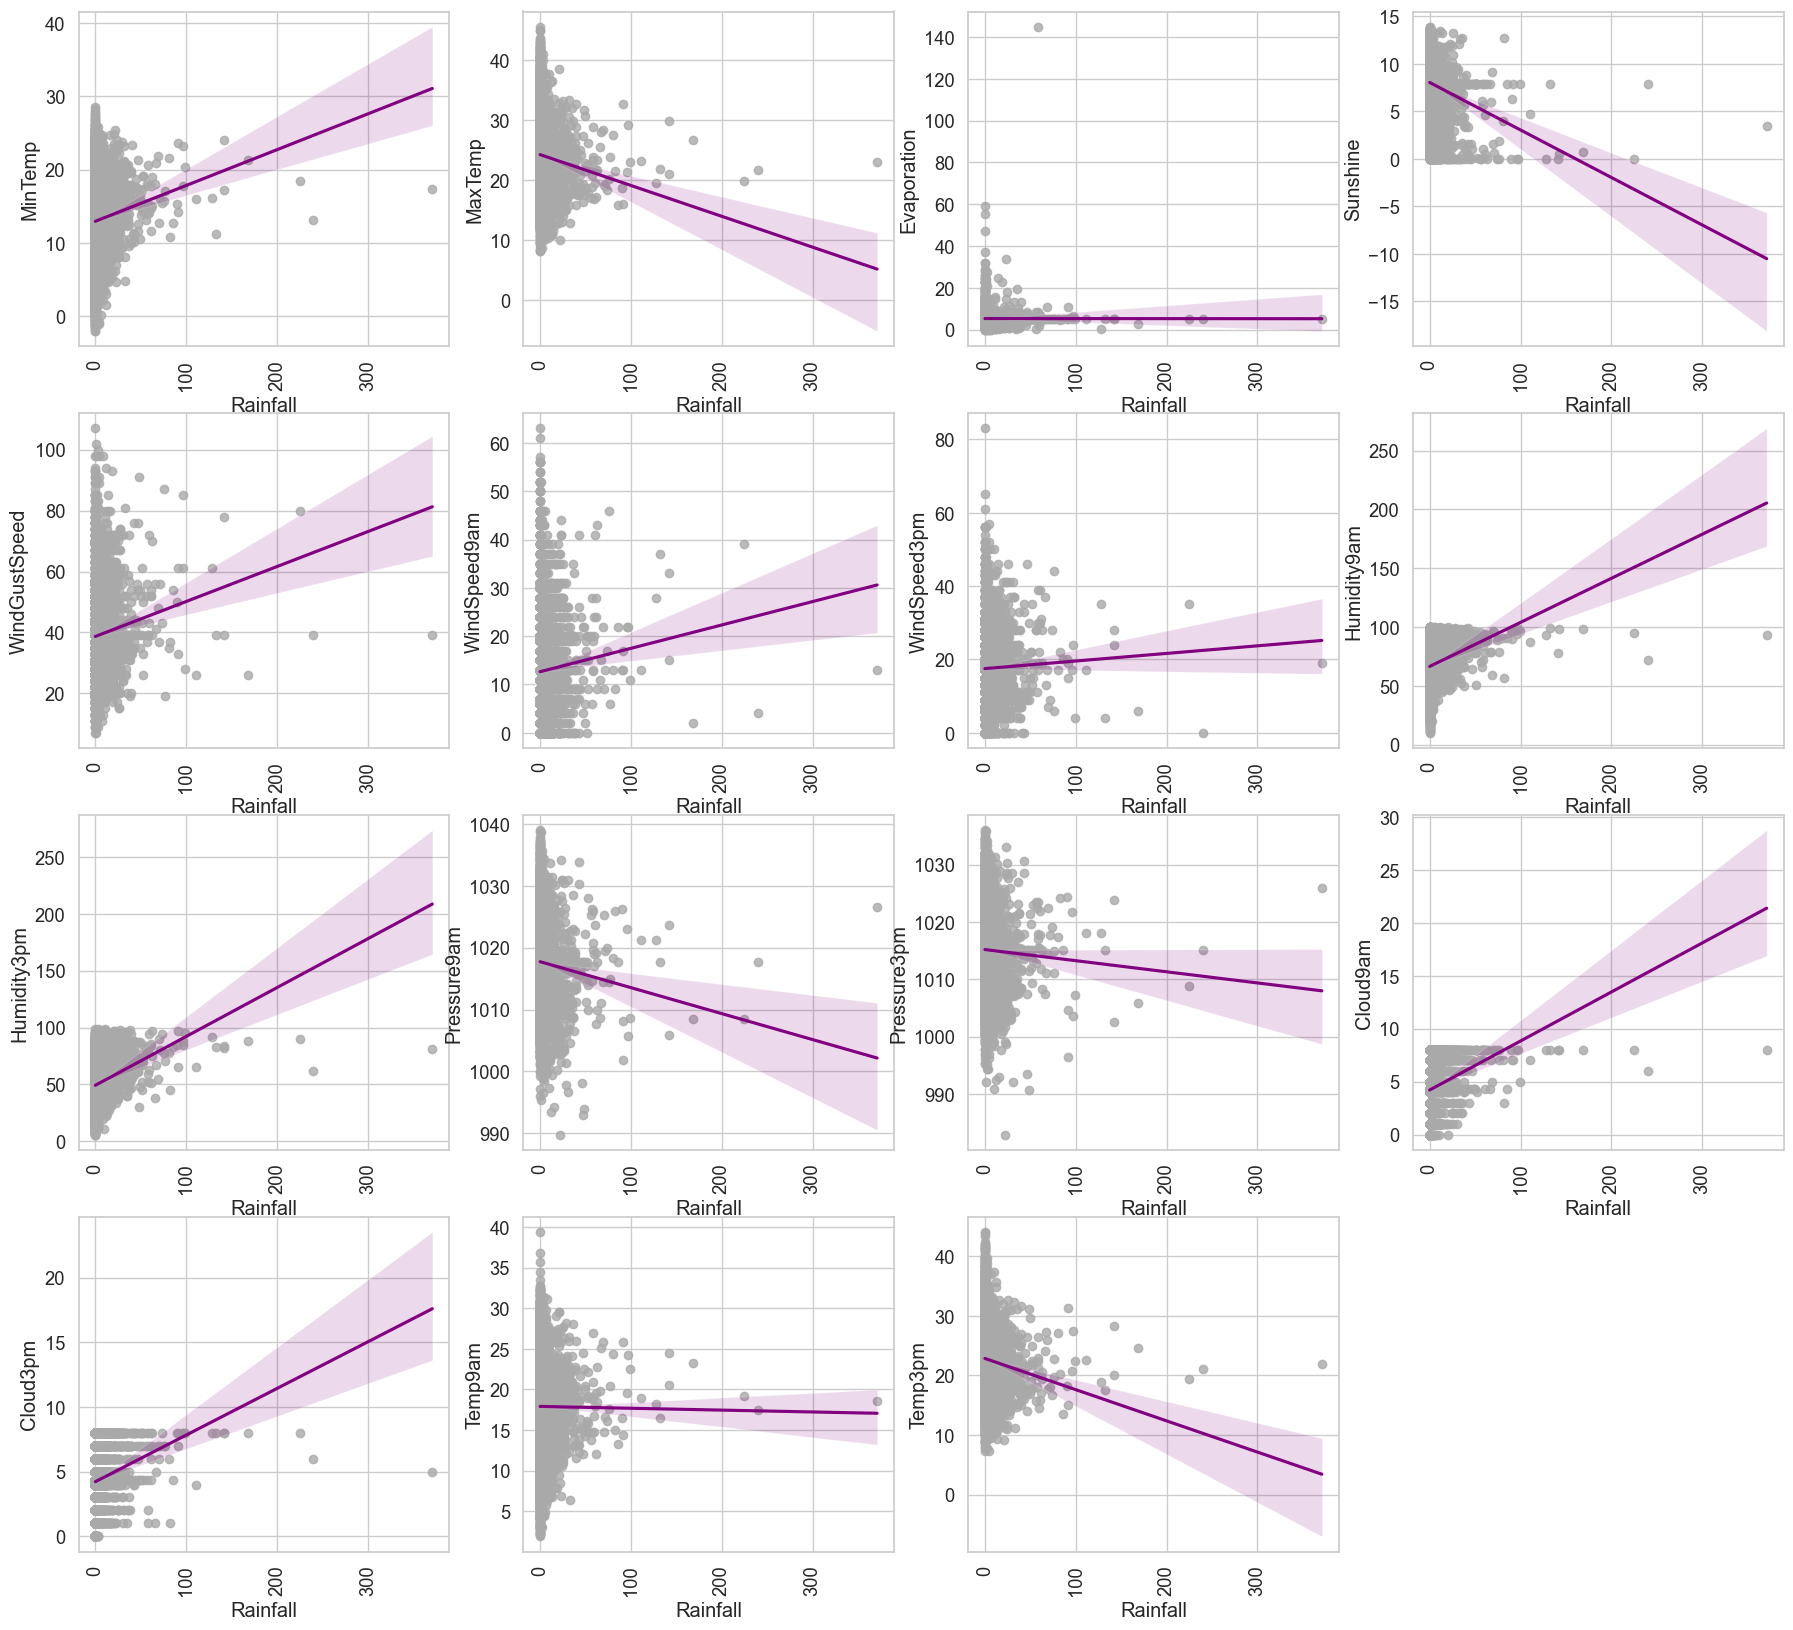

In [29]:
sb.set_style('whitegrid')
pt.figure(figsize=(22,20))
p=1
for i in float_cols:
    if p<=16:
        if i=='Rainfall':
            continue
        ax=pt.subplot(4,4,p)
        sb.regplot(y=df[i],x='Rainfall',color='darkgrey',data=df,line_kws=dict(color='purple'))
        pt.xticks(rotation=90)
    p+=1

Plotted regression graphs for rainfall with every float column to determine the relation.

In [30]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le=LabelEncoder()
oe=OrdinalEncoder()

In [31]:
#encoding target column
df['RainTomorrow']=le.fit_transform(df['RainTomorrow']) 

#encoding independent variables
for i in obj_cols: 
    df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

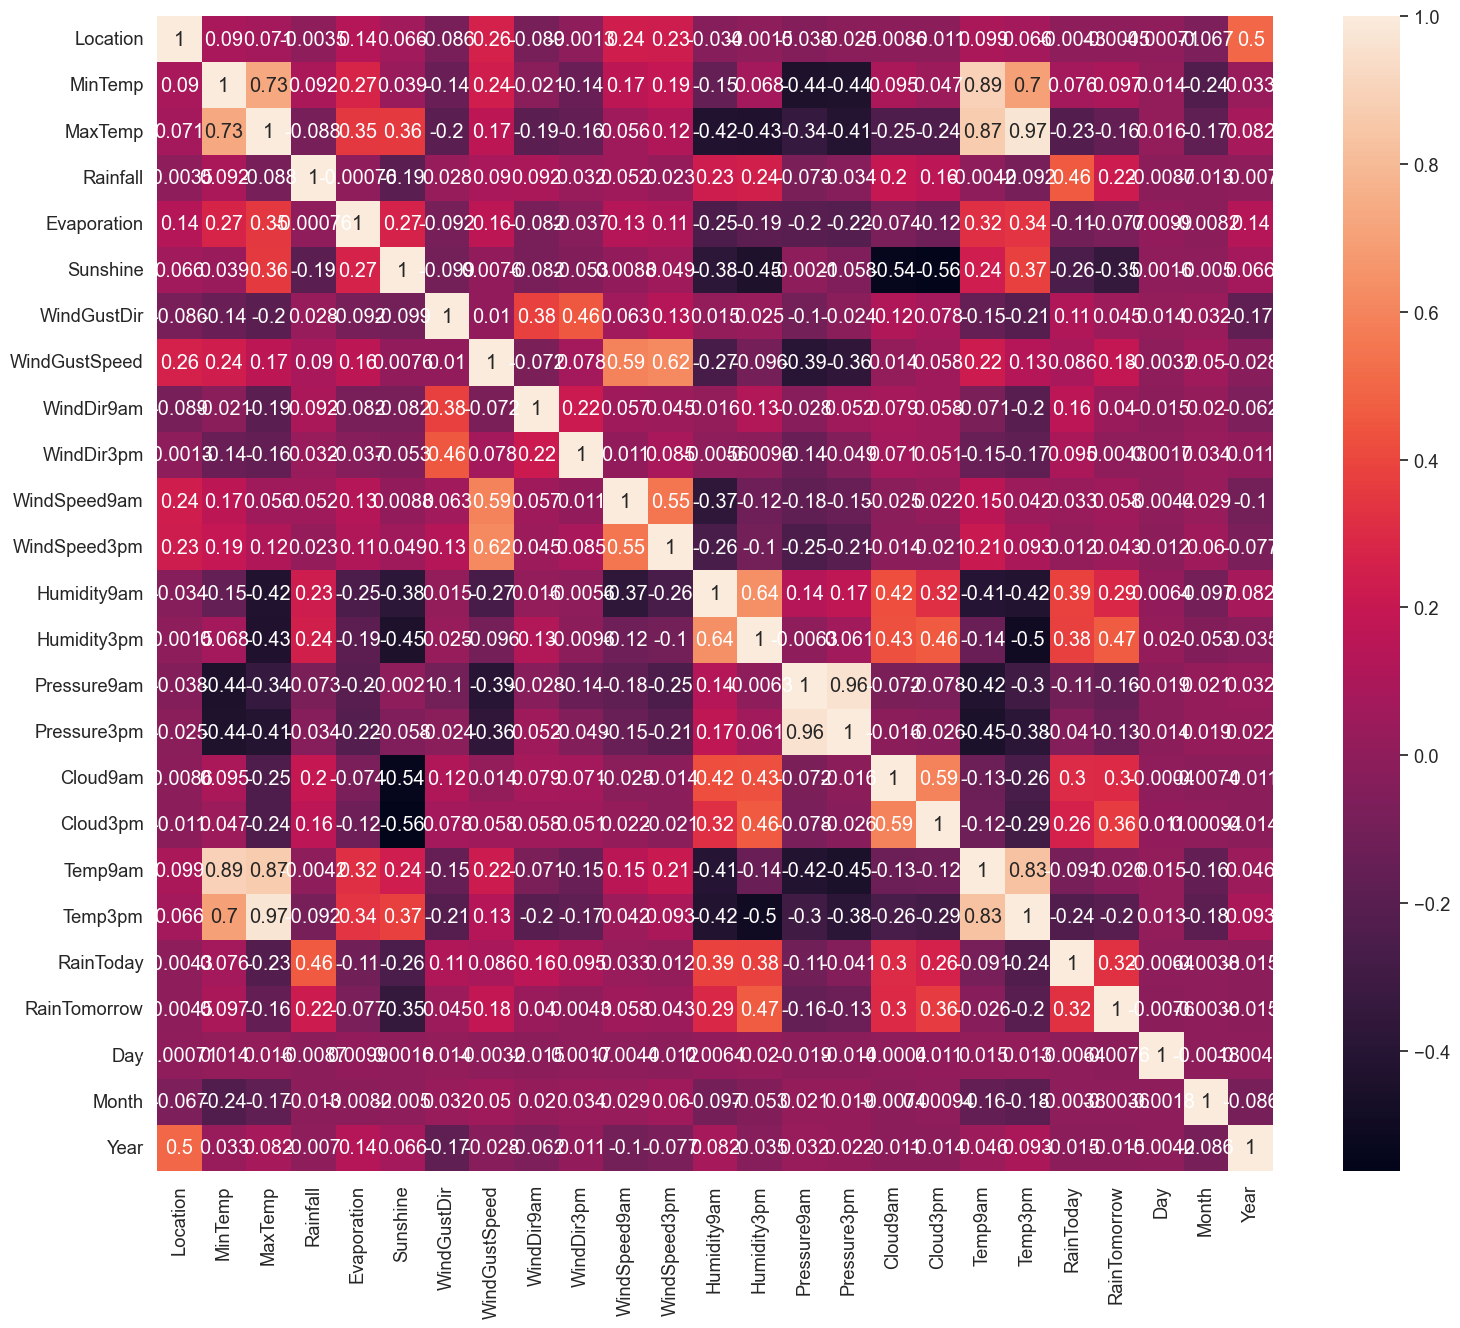

In [35]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

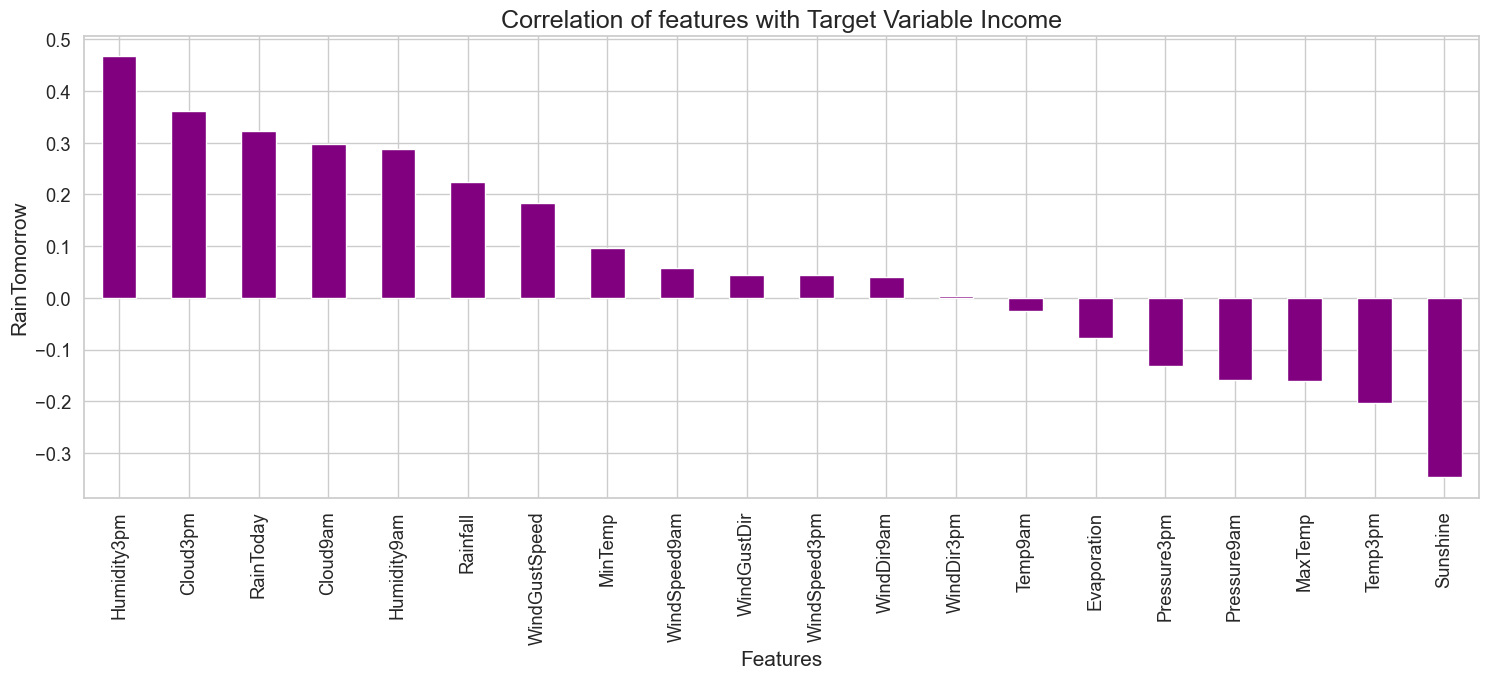

In [68]:
plt.figure(figsize = (18,6))
df.corr()['RainTomorrow'].drop(['RainTomorrow']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('RainTomorrow',fontsize=15)
plt.title('Correlation of features with Target Variable Income',fontsize = 18)
plt.show()

Based on our analysis, the columns containing location, month, day, and year will be excluded from the dataset. This decision is motivated by the negligible correlation observed between these features and the target variables, namely "RainTomorrow" and "rainfall."

In [36]:
df.drop(['Location','Day','Month','Year'],axis=1,inplace=True)

## Removing outliers using boxplot and zscore

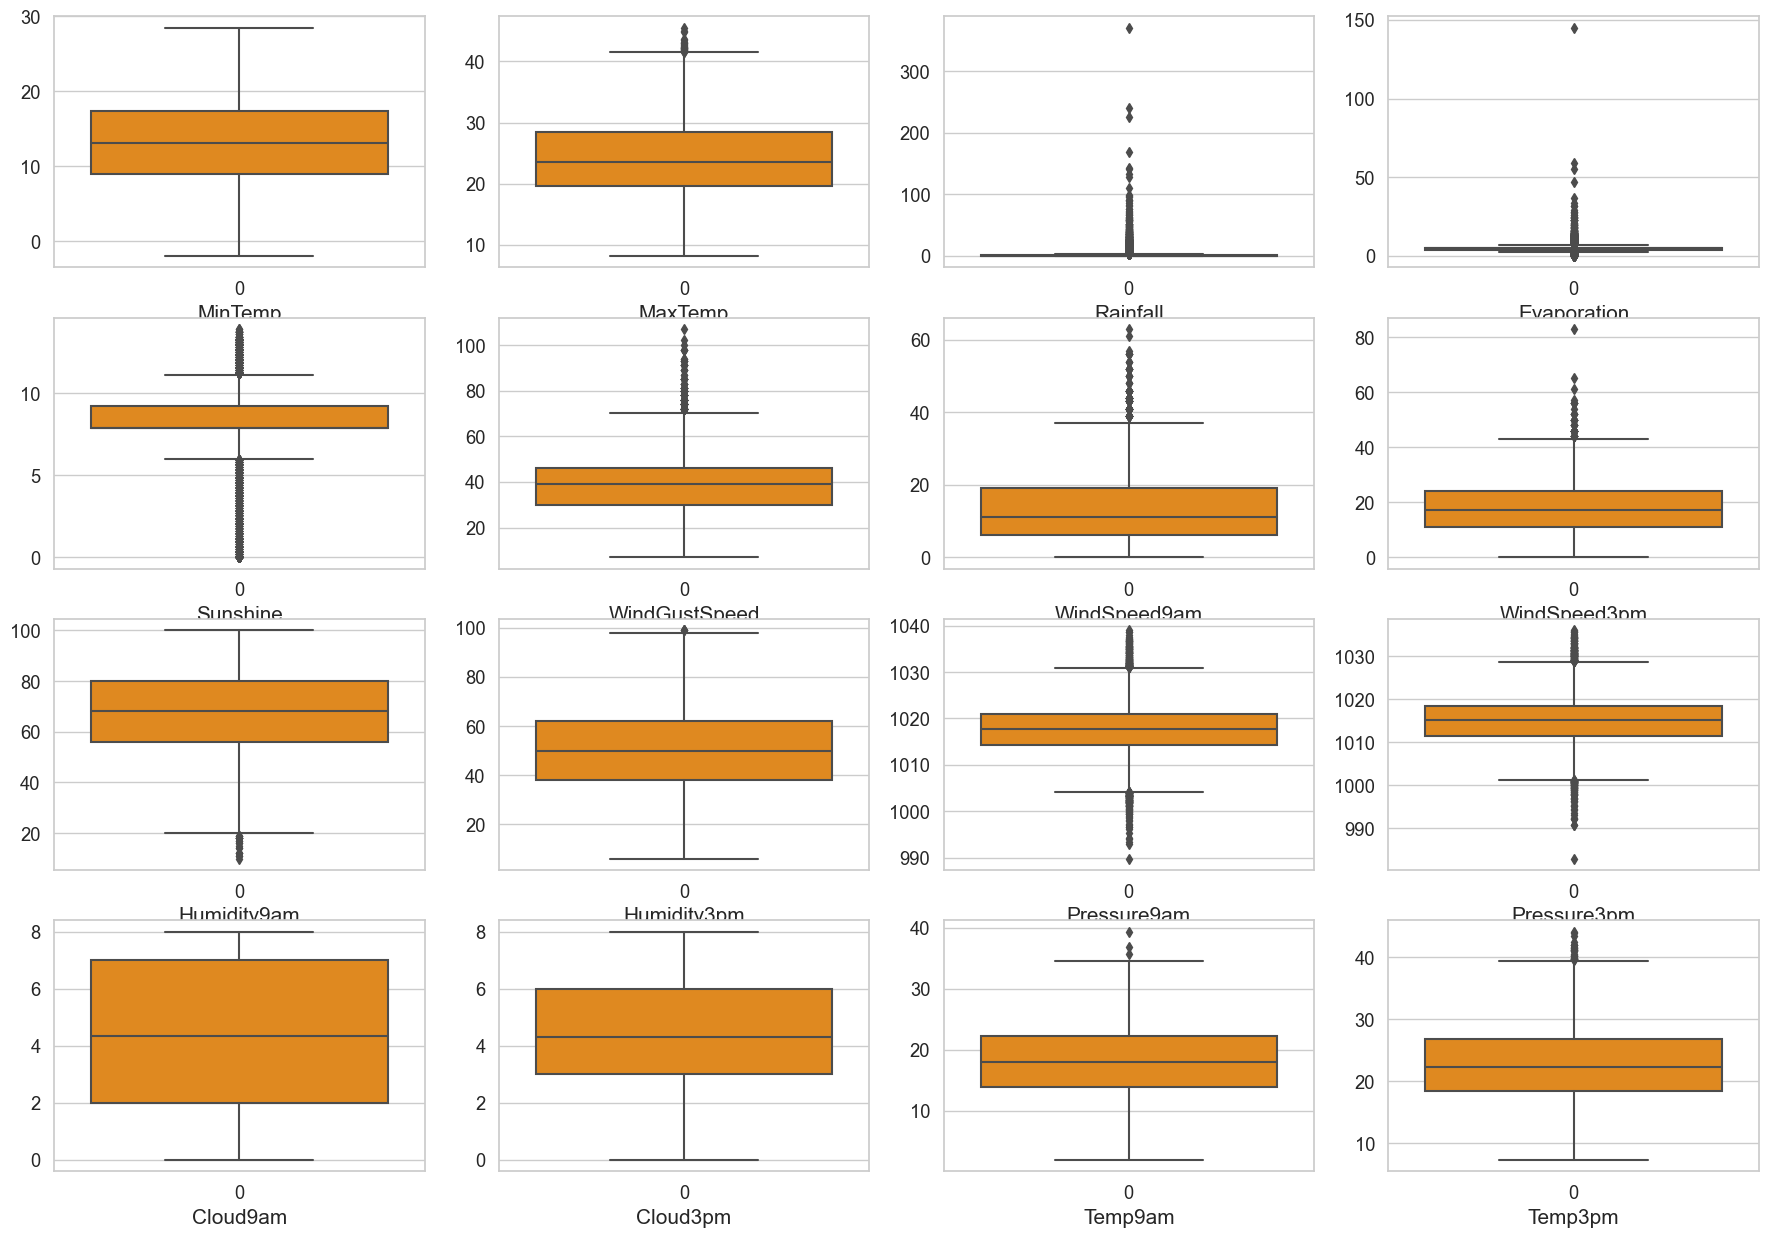

In [37]:
pt.figure(figsize=(22,15))
p=1
for i in float_cols:
    if p<=16:
        ax=pt.subplot(4,4,p)
        sb.boxplot(df[i],color='darkorange')
        pt.xlabel(i,fontsize=15)
    p+=1
pt.show()

#### Examination of the data reveals the presence of a significant number of outliers.

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))
thershold=3
df1=df[(z<3).all(axis=1)]
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (6762, 21)
Shape of the dataframe after removing outliers:  (6409, 21)
Percentage of data loss post outlier removal:  5.220349009168885


Given the acceptable data loss rate of 5.2%, we have opted to proceed with the current dataset.

### Checking and removing skewness using log transformation

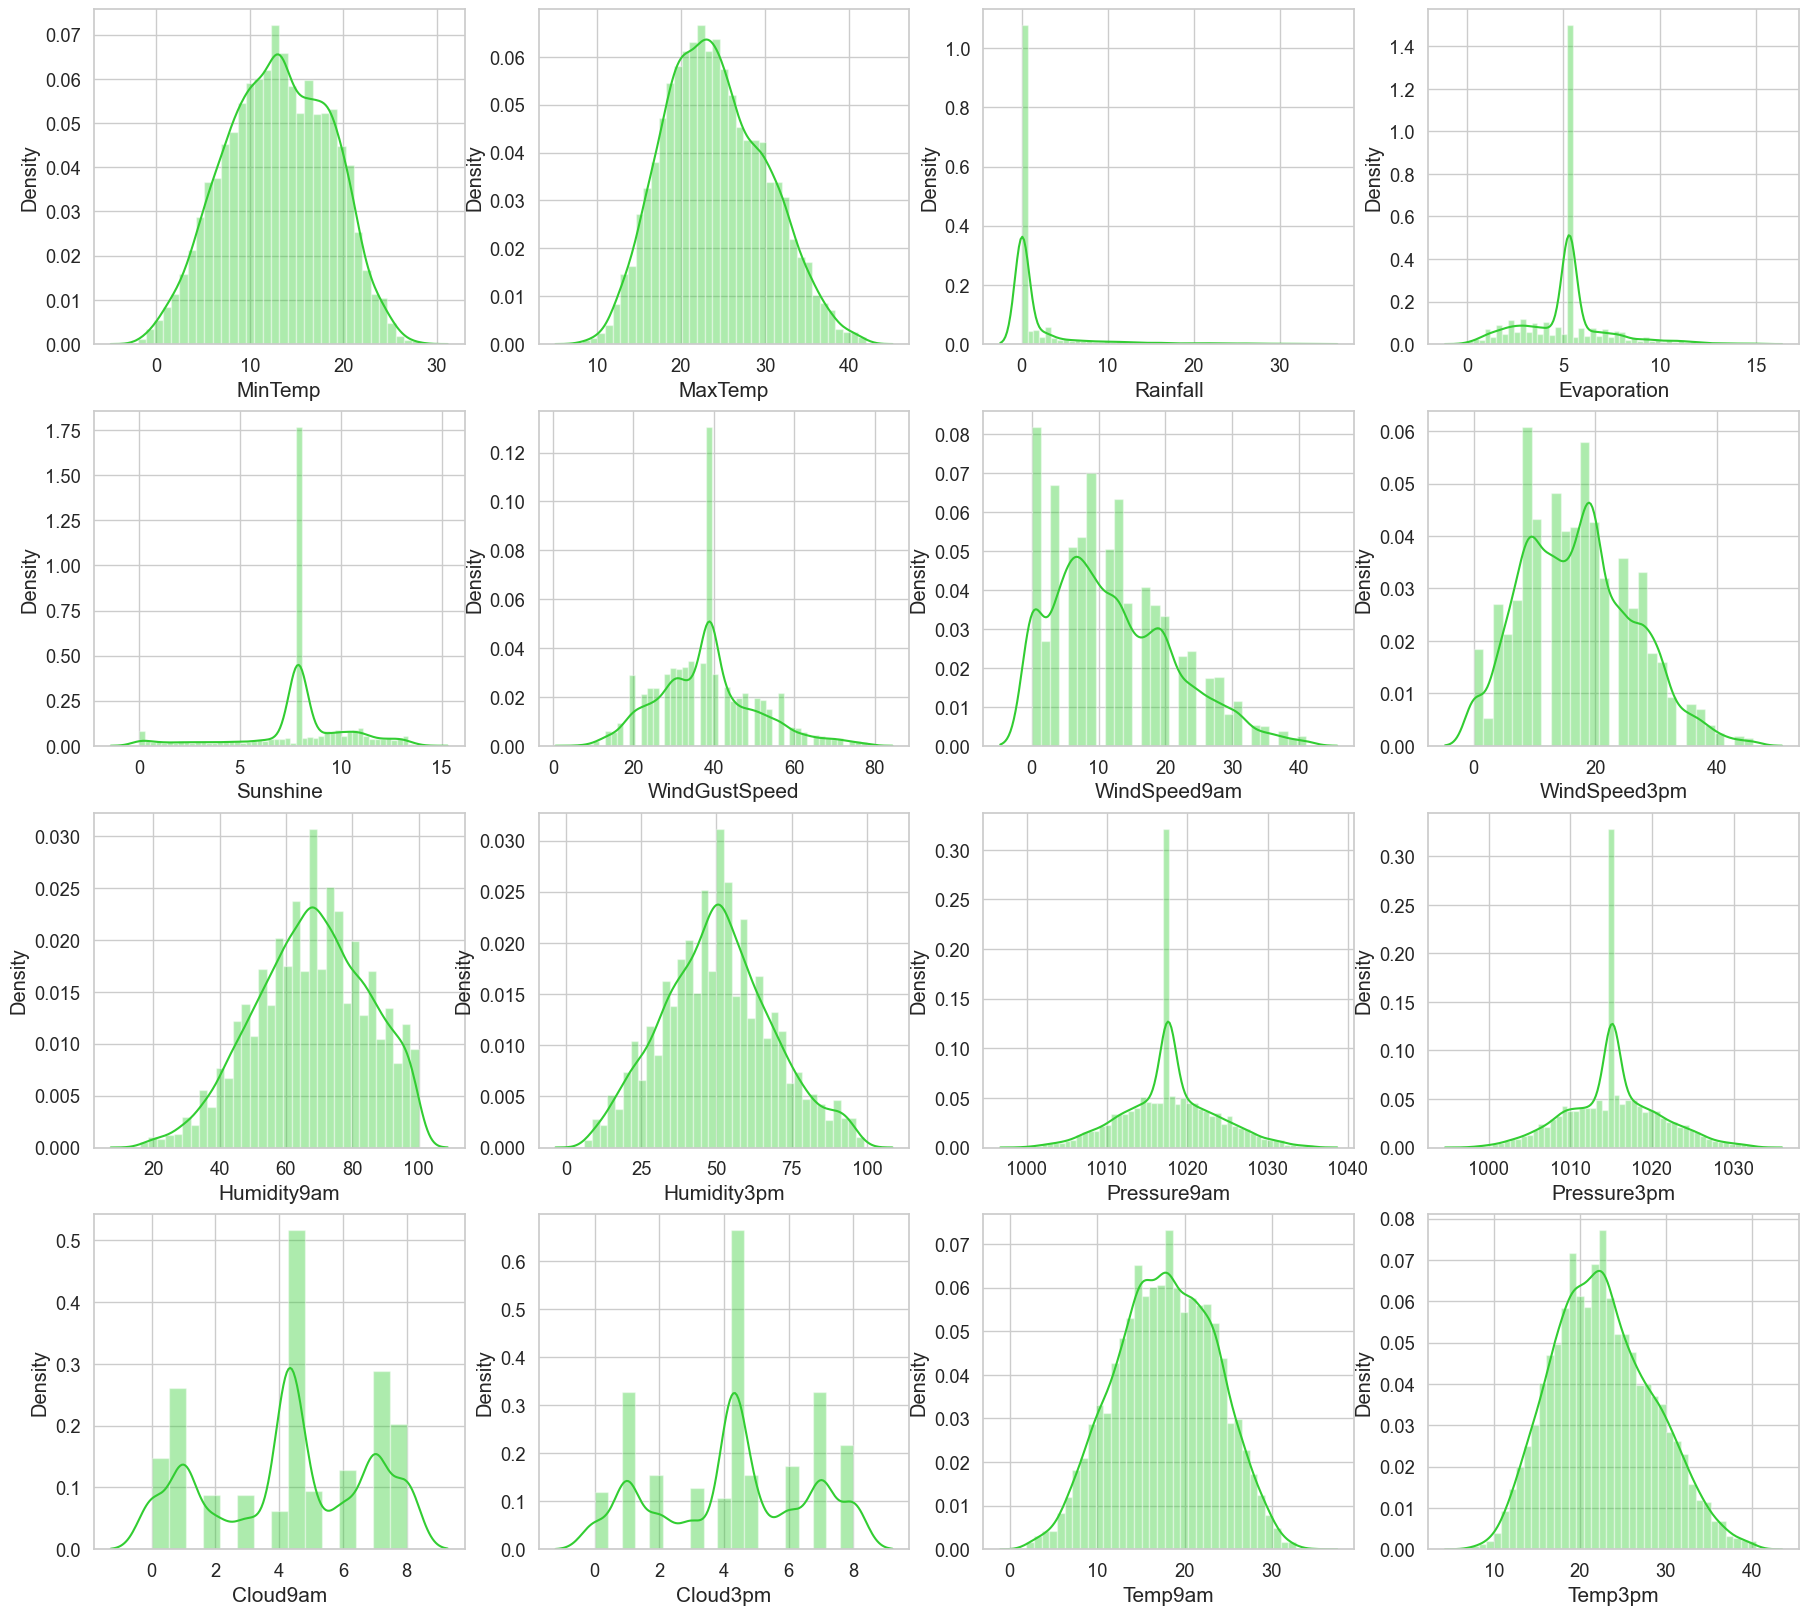

MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         3.515410
Evaporation      0.721400
Sunshine        -0.890629
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am     0.677433
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
dtype: float64

In [39]:
pt.figure(figsize=(22,20))
p=1
for i in float_cols:
    if p<=16:
        ax=pt.subplot(4,4,p)
        sb.distplot(df1[i],  color="limegreen", kde= True)
        pt.xlabel(i,fontsize=15)
    p+=1
pt.show()
df1.skew()

Our examination of the data indicates minimal skewness across most features, with the exception of the "rainfall" column. As this variable is not currently designated as the target variable, we will address the skewness within this column to improve the model's performance on other target variables.

In [40]:
df2=df1.copy() 
df2['Rainfall']=np.log1p(df2['Rainfall'])

## Standard Scaling

In [41]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x=df2.drop(['RainTomorrow'],axis=1)
y=df2['RainTomorrow']

In [42]:
x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.069172,-0.190821,-0.025691,0.088552,-0.017794,1.222524,0.483303,1.317076,1.373685,0.867217,0.756780,0.199610,-1.559588,-1.759834,-1.436942,1.495570,0.017600,-0.162690,-0.149628,-0.535675
1,-1.013829,0.174339,-0.564612,0.088552,-0.017794,1.413467,0.483303,-0.222676,1.596977,-0.908710,0.536178,-1.395627,-1.394797,-1.252796,-1.313436,0.014663,0.017600,-0.109936,0.276421,-0.535675
2,-0.021078,0.273928,-0.564612,0.088552,-0.017794,1.604410,0.646634,1.317076,1.596977,0.756221,0.977382,-1.750124,-1.120144,-1.777318,-1.154643,0.014663,-0.982885,0.558287,0.088960,-0.535675
3,-0.688929,0.655685,-0.564612,0.088552,-0.017794,-0.495963,-1.149999,0.437218,-1.752399,-0.131742,-0.897735,-1.336544,-1.889171,-0.028909,-0.431253,0.014663,0.017600,0.048327,0.651345,-0.535675
4,0.809223,1.369406,0.230173,0.088552,-0.017794,1.222524,0.238308,-1.322499,-0.189357,-0.575724,0.315576,0.849521,-0.955352,-1.217827,-1.631022,1.091303,1.603475,-0.004427,1.196689,-0.535675


## Checking for Multicollinearity

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Features,vif
0,MinTemp,8.941499
1,MaxTemp,26.286043
2,Rainfall,4.692753
3,Evaporation,1.606410
4,Sunshine,1.998667
5,WindGustDir,1.532163
6,WindGustSpeed,2.207334
7,WindDir9am,1.324110
8,WindDir3pm,1.404301
9,WindSpeed9am,1.969396


Our iterative analysis process ("hit and trial methods") identified the necessity of removing three specific columns: Pressure9am, Temp3pm, and Temp9am. This action ensures that all Variance Inflation Factor (VIF) values fall within the acceptable range, mitigating the potential for multicollinearity and improving model performance.

In [44]:
x.drop(['Pressure9am','Temp9am','Temp3pm'],axis=1,inplace=True)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Features,vif
0,MinTemp,4.658515
1,MaxTemp,5.620928
2,Rainfall,4.672109
3,Evaporation,1.580147
4,Sunshine,1.971847
5,WindGustDir,1.513974
6,WindGustSpeed,2.155265
7,WindDir9am,1.300021
8,WindDir3pm,1.331060
9,WindSpeed9am,1.936683


Our efforts to address multicollinearity have been successful. All Variance Inflation Factor (VIF) values are currently within the acceptable range.

## Balancing the data using SMOTE.

In [46]:
y.value_counts()

RainTomorrow
0.0    4979
1.0    1430
Name: count, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

y.value_counts()

RainTomorrow
0.0    4979
1.0    4979
Name: count, dtype: int64

# Bulding Model

## 1.Finding the best Random State 

In [49]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7941767068273092 on Random_state 199


Hence the best Random state is 199 

### Logistic Reggression

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, random_state=199, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7941767068273092


Confusion matrix of Logistics Regression : 
 [[1219  300]
 [ 315 1154]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

         0.0       0.79      0.80      0.80      1519
         1.0       0.79      0.79      0.79      1469

    accuracy                           0.79      2988
   macro avg       0.79      0.79      0.79      2988
weighted avg       0.79      0.79      0.79      2988



### Finding Optimal value of n_neighbors for KNN

In [51]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] 
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,y_pred))
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.33182389161549847
RMSE value for k=  2 is: 0.33131921620309784
RMSE value for k=  3 is: 0.3828659626834515
RMSE value for k=  4 is: 0.3819908393387047
RMSE value for k=  5 is: 0.41029261116154864
RMSE value for k=  6 is: 0.4020529646021548
RMSE value for k=  7 is: 0.4203651119077759
RMSE value for k=  8 is: 0.415157910957734
RMSE value for k=  9 is: 0.42903334576749996
RMSE value for k=  10 is: 0.41956821050503684
RMSE value for k=  11 is: 0.437147256917225
RMSE value for k=  12 is: 0.42981269853657555


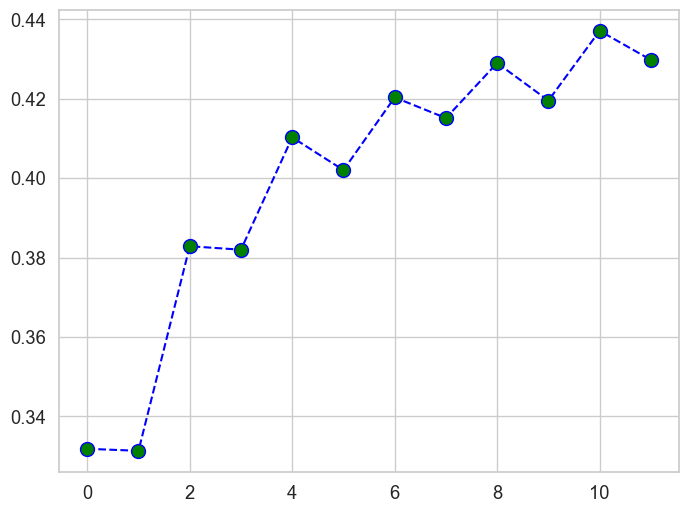

In [52]:
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

#### At k=2, we get the minimum RMSE value which approximately 0.33131921620309784 , and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case

### Applying other classification algorithm

In [55]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('-'*100)

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7941767068273092


Confusion matrix : 
 [[1219  300]
 [ 315 1154]]


Classification Report : 
               precision    recall  f1-score   support

         0.0       0.79      0.80      0.80      1519
         1.0       0.79      0.79      0.79      1469

    accuracy                           0.79      2988
   macro avg       0.79      0.79      0.79      2988
weighted avg       0.79      0.79      0.79      2988



----------------------------------------------------------------------------------------------------
Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8360107095046854


Confusion matrix : 
 [[1225  294]
 [ 196 1273]]


Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.81      0.83      1519
         1.0       0.81      0.87      0.84      1469

    accuracy                           0.84    

## CrossValidation :

In [59]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 2),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m,x,y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('-'*100)



Cross Validation Score LogisticRegression() :

Score : [0.76807229 0.66616466 0.71084337 0.76996484 0.82019086]
Mean Score : 0.7470472043876157
Std deviation : 0.05323527038106758


----------------------------------------------------------------------------------------------------


Cross Validation Score SVC() :

Score : [0.79568273 0.60291165 0.7314257  0.82270216 0.84681065]
Mean Score : 0.759906577591128
Std deviation : 0.0874461026123045


----------------------------------------------------------------------------------------------------


Cross Validation Score GaussianNB() :

Score : [0.75351406 0.71034137 0.68875502 0.73882471 0.77147162]
Mean Score : 0.7325813550535644
Std deviation : 0.029681560387074653


----------------------------------------------------------------------------------------------------


Cross Validation Score DecisionTreeClassifier() :

Score : [0.69578313 0.56526104 0.76757028 0.82069312 0.84781517]
Mean Score : 0.7394245490248286
Std deviation : 0.1

In [60]:
parameter= {'criterion' : ['gini', 'entropy'],'min_samples_split':[3,5,8],'max_depth' : [20,30,40],'n_estimators' : [100, 150, 200]}

In [63]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.906 total time=   0.9s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.884 total time=   0.7s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.897 total time=   0.6s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.895 total time=   0.6s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [64]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'min_samples_split': 3,
 'n_estimators': 200}

In [65]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 200, max_depth=40 ,min_samples_split= 3)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.9156626506024096


# Saving model

In [66]:
import joblib
joblib.dump(Final_mod,'Census_Income_Final.pkl')

['Census_Income_Final.pkl']